**K-Means Clustering -**

K-Mean clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters. It is a centroid based algorithm where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum distance between the data points and their respective clusters.

In [34]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import StandardScaler
# Suppress Warning
import warnings
warnings.filterwarnings("ignore")


In [35]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
mall_df.isnull().sum()  #checking null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
mall_df.shape

(200, 5)

In [40]:
# correlation plotting
mall_df1 = mall_df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
mall_df1.corr()
# we can evaluate that there is positive correlation bewteen spending score and income

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# **Checking Outliners**

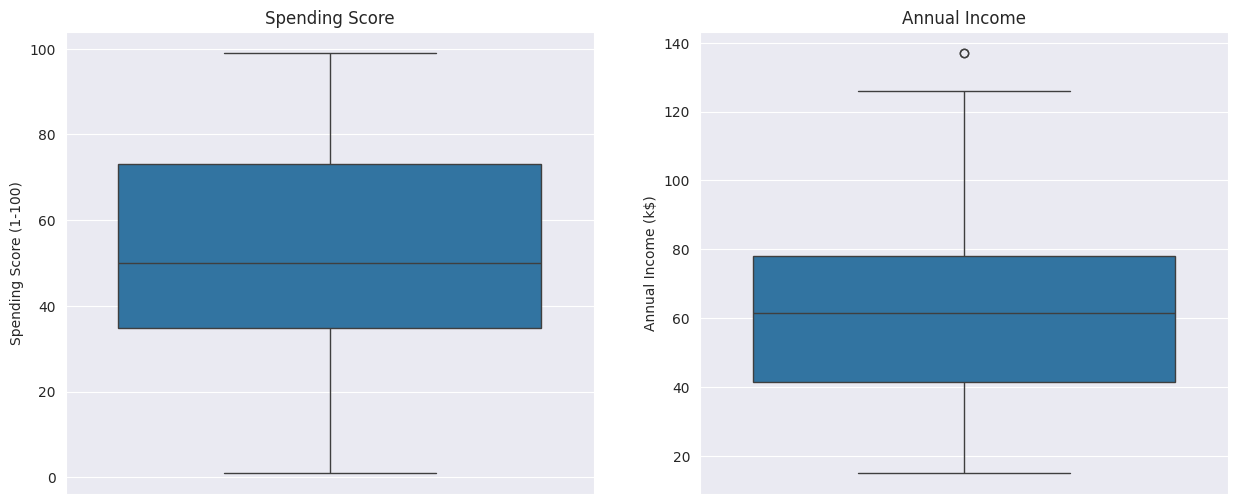

In [41]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(data=mall_df, y = "Spending Score (1-100)")
plt.title("Spending Score")

plt.subplot(1,2,2)
sns.boxplot(data=mall_df, y = "Annual Income (k$)")
plt.title("Annual Income")
plt.show()

# **Exploratory Data Analysis**

Univariate Analysis - Numerical Data Type

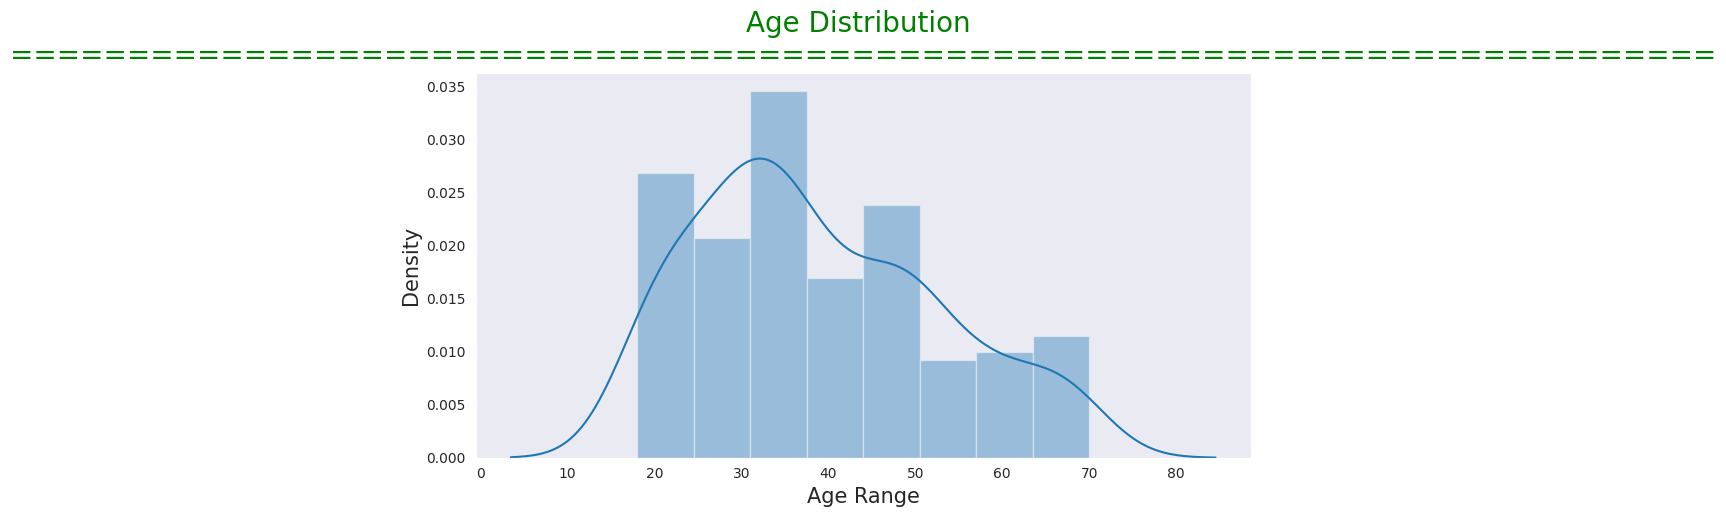

In [42]:
# checking age distribution
plt.figure(figsize=(10,5))
sns.distplot(mall_df.Age)
plt.title("Age Distribution \n=========================================================================", fontsize =20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.grid()
plt.show()
# this represents there are customers of wide variety of ages

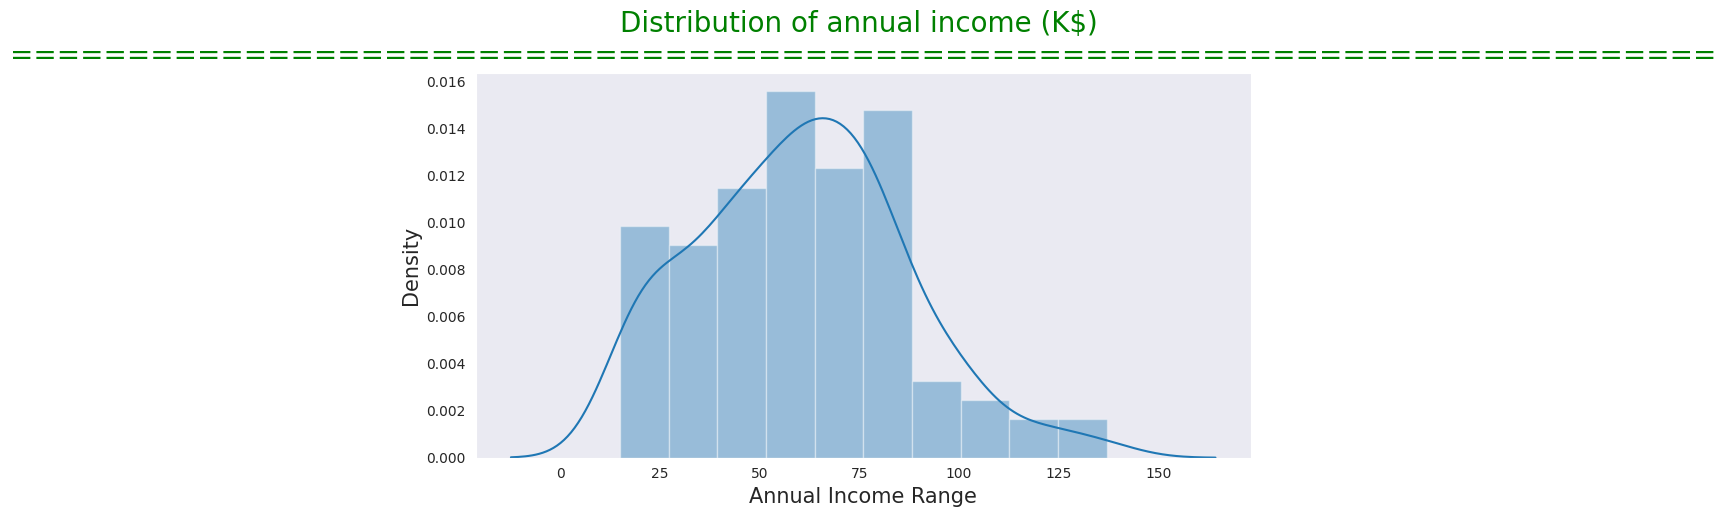

In [43]:
# Annual income distribution
plt.figure(figsize=(10,5))
sns.distplot(mall_df["Annual Income (k$)"])
plt.title("Distribution of annual income (K$) \n=========================================================================", fontsize =20, color="green")
plt.xlabel("Annual Income Range", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.grid()
plt.show()
# it is anlysed that most of the annual income falls between 50k to 85k approximately

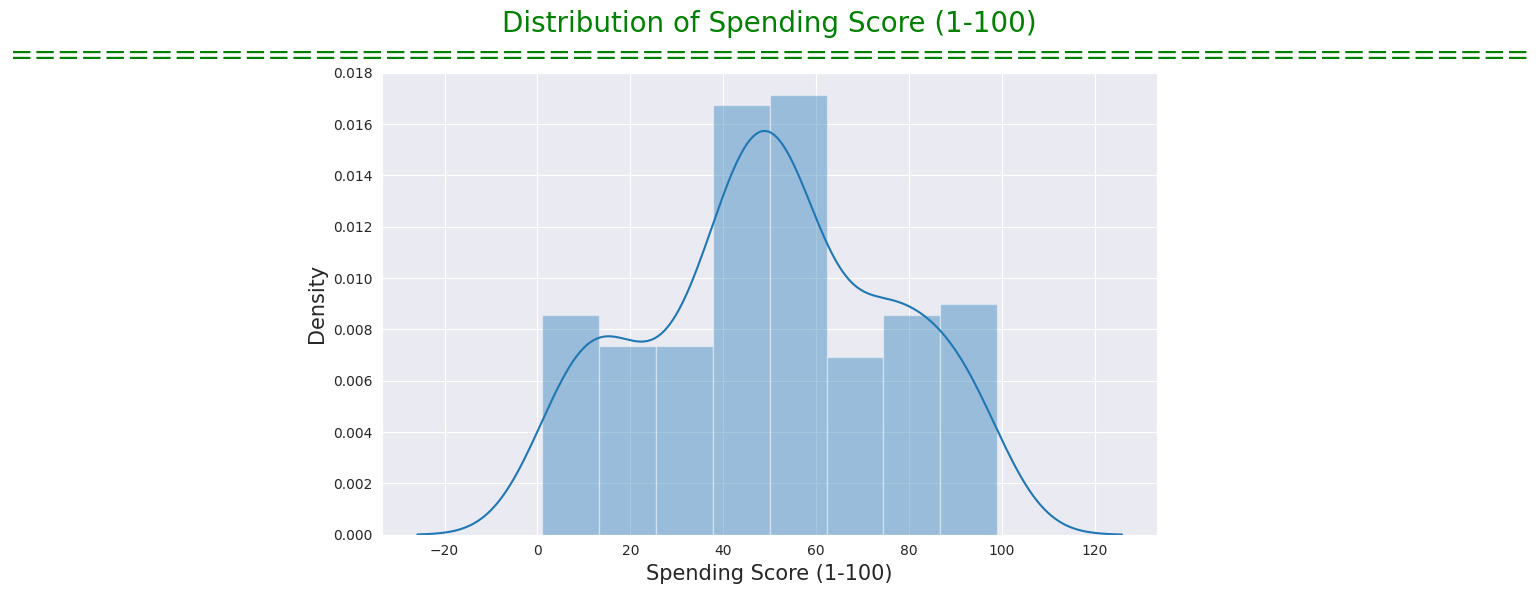

In [44]:
# Spending Score (1-100) Distribution
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(mall_df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()
#Most of the customers got the score ranging between 40 to 60

Univariate data analysis- categorical data type

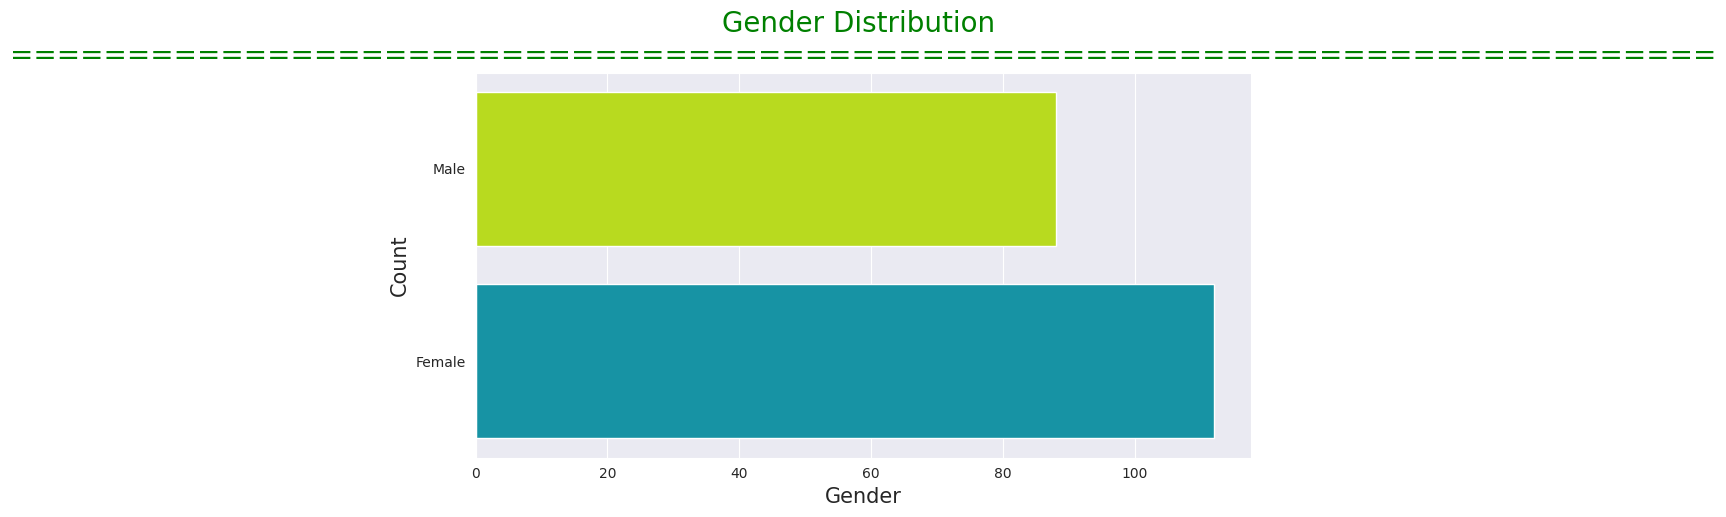

In [45]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(mall_df.Gender, palette = "nipy_spectral_r")
plt.title("Gender Distribution \n=========================================================================", fontsize =20, color="green")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()
# female customers are more that male customers

Bivariate analysis- Numerical data type

<function matplotlib.pyplot.show(close=None, block=None)>

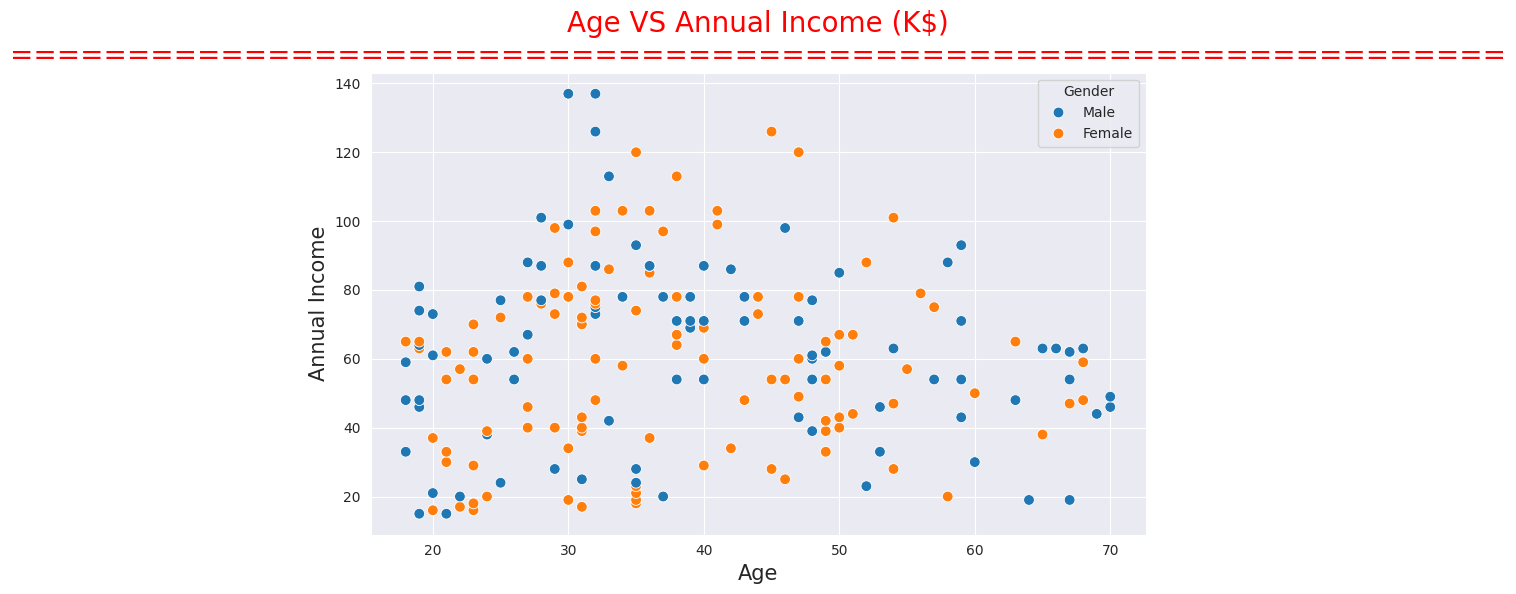

In [46]:
# age vs annual income
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.scatterplot(data = mall_df, x = "Age", y ="Annual Income (k$)", hue = "Gender", s=60)
plt.title("Age VS Annual Income (K$)\n================================================================", fontsize= 20, color = "red")
plt.xlabel("Age", fontsize= 15)
plt.ylabel("Annual Income", fontsize =15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

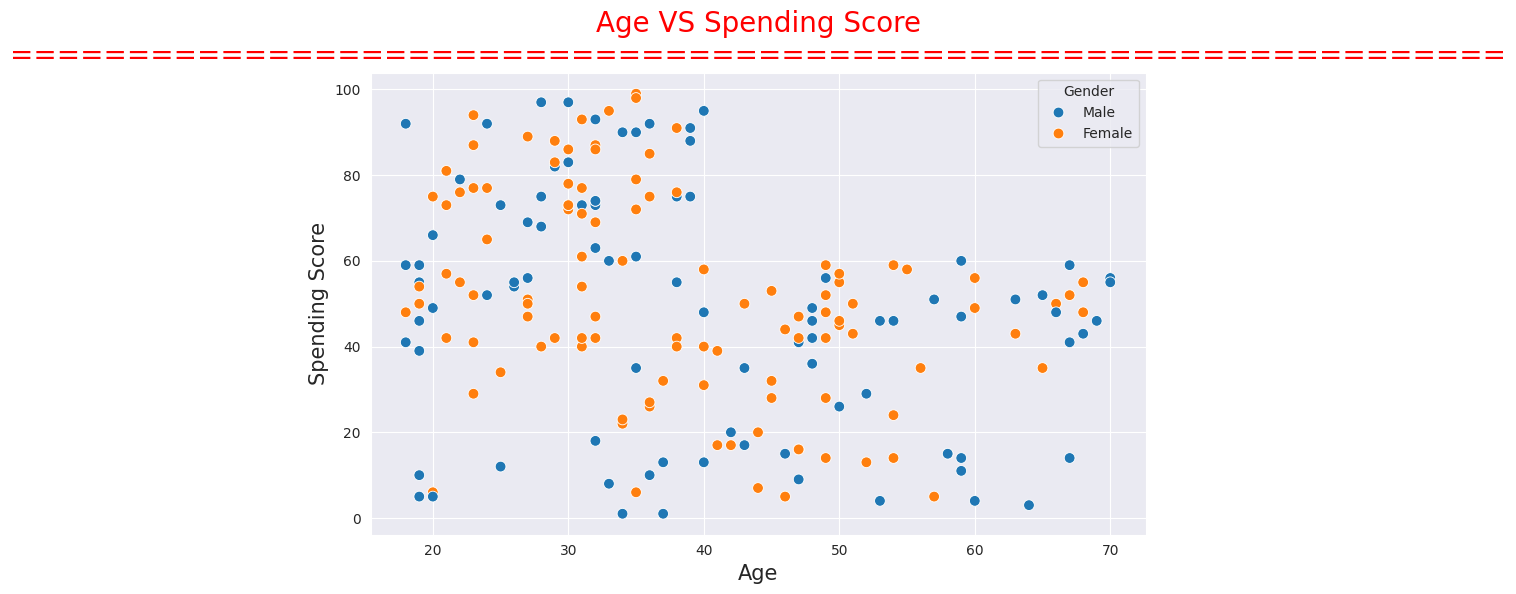

In [47]:
# age VS soending score
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.scatterplot(data = mall_df, x = "Age", y ="Spending Score (1-100)",hue = "Gender",  s=60)
plt.title("Age VS Spending Score\n================================================================", fontsize= 20, color = "red")
plt.xlabel("Age", fontsize= 15)
plt.ylabel("Spending Score", fontsize =15)
plt.show

# Binning- Age, spending score and annual income

In [48]:
mall_df.describe()  # to find out max and min values

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
# age binning
age_18_25= mall_df.Age[(mall_df.Age>=18) & (mall_df.Age<=25)]
age_26_35= mall_df.Age[(mall_df.Age>=26) & (mall_df.Age<=35)]
age_36_45 = mall_df.Age[(mall_df.Age>=36)& (mall_df.Age<=45)]
age_46_55= mall_df.Age[(mall_df.Age>=46)& (mall_df.Age<=55)]
age_56_65= mall_df.Age[(mall_df.Age>=56) & (mall_df.Age<=65)]
age_66_above = mall_df.Age[(mall_df.Age>=66)]

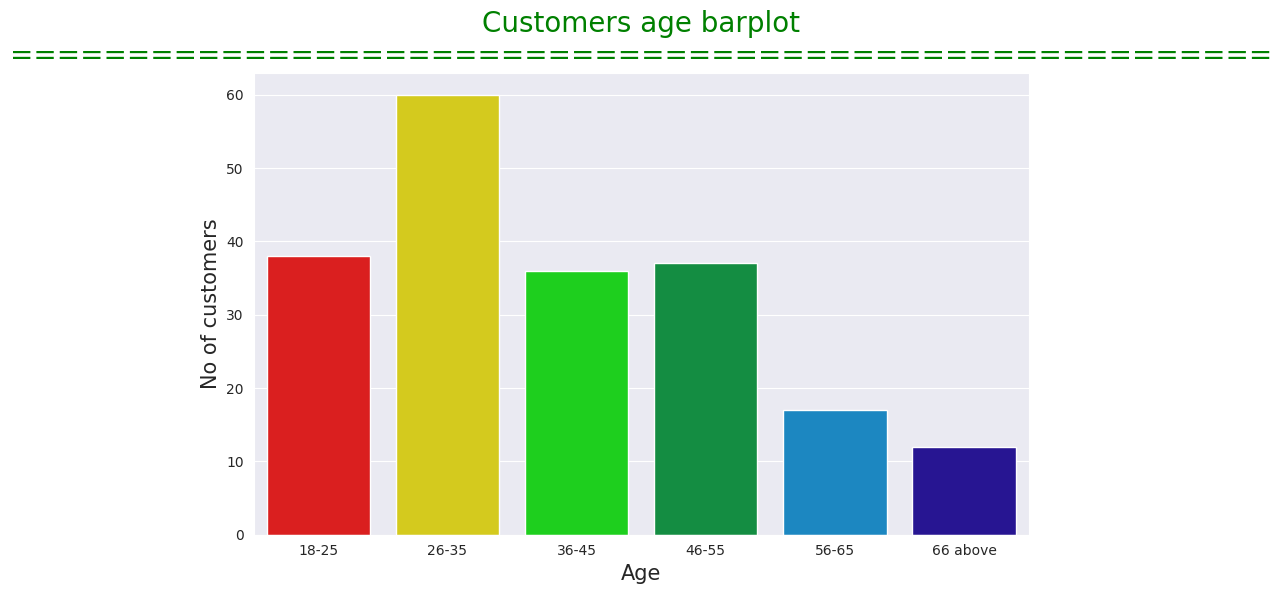

In [50]:
# barplot
x = ["18-25","26-35","36-45","46-55","56-65","66 above"]
y = [len(age_18_25.values), len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_65.values),len(age_66_above.values)]
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customers age barplot\n======================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("No of customers", fontsize=15)
plt.show()
# through this we can categorize the number of customers

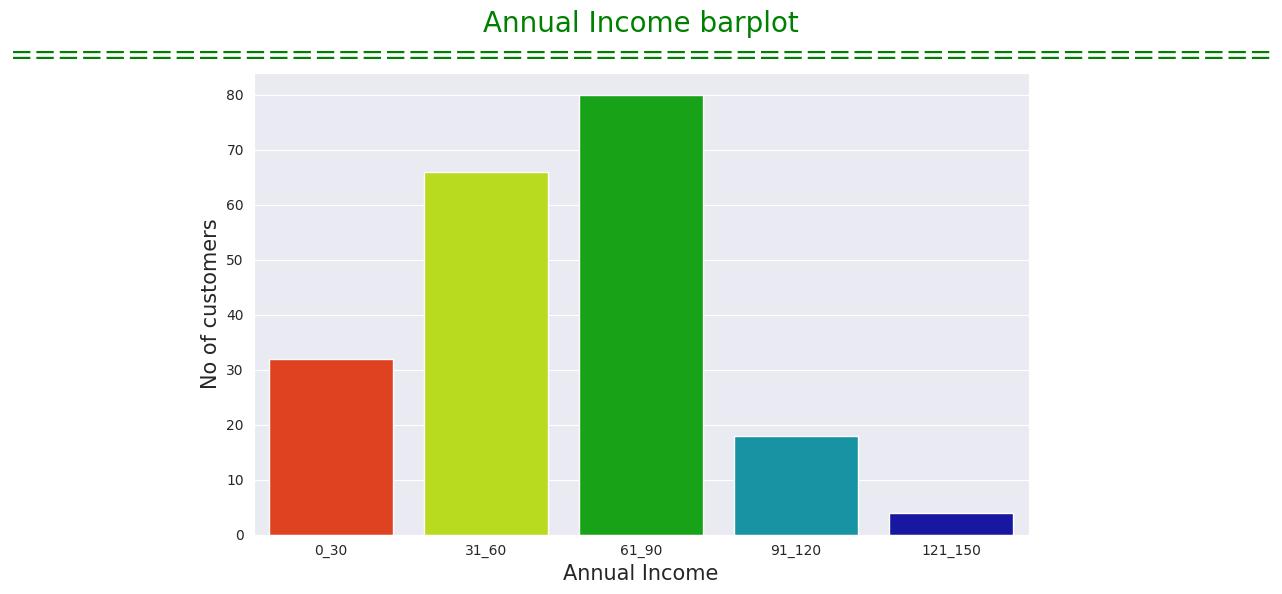

In [51]:
# binning annual income
ai0_30 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"]>=0) & (mall_df["Annual Income (k$)"]<=30)]
ai31_60 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"]>=31) & (mall_df["Annual Income (k$)"]<=60)]
ai61_90 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"]>=61) & (mall_df["Annual Income (k$)"]<=90)]
ai91_120 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"]>=91) & (mall_df["Annual Income (k$)"]<=120)]
ai121_150 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"]>=121) & (mall_df["Annual Income (k$)"]<=150)]

# bal plot
x = ["0_30","31_60","61_90","91_120","121_150"]
y = [len(ai0_30.values), len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Annual Income barplot\n======================================================", fontsize=20, color="green")
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("No of customers", fontsize=15)
plt.show()
# plots the highest income group

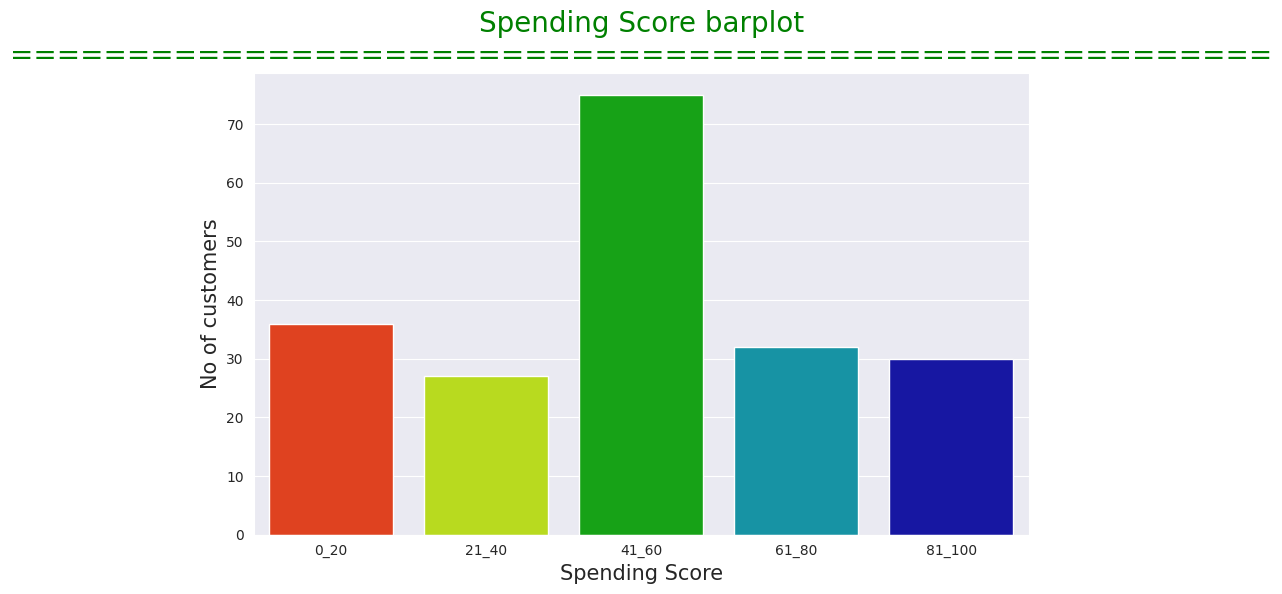

In [52]:
# binning spending score
ss0_20 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"]>=0) & (mall_df["Spending Score (1-100)"]<=20)]
ss21_40 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"]>=21) & (mall_df["Spending Score (1-100)"]<=40)]
ss41_60 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"]>=41) & (mall_df["Spending Score (1-100)"]<=60)]
ss61_80 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"]>=61) & (mall_df["Spending Score (1-100)"]<=80)]
ss81_100 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"]>=81) & (mall_df["Spending Score (1-100)"]<=100)]

# Barplot
x = ["0_20","21_40","41_60","61_80","81_100"]
y = [len(ss0_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Spending Score barplot\n======================================================", fontsize=20, color="green")
plt.xlabel("Spending Score", fontsize=15)
plt.ylabel("No of customers", fontsize=15)
plt.show()
# highest spending score of customers found to be on group 41-60

# **Rescaling**

In [53]:
mall_df_scaled= mall_df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
# class instance
scaler= StandardScaler()

# fit transform
mall_df_scaled_fit= scaler.fit_transform(mall_df_scaled)
#mall_df_scaled_fit

In [54]:
mall_df_scaled_fit = pd.DataFrame(mall_df_scaled_fit, columns=["Age","Annual Income (k$)","Spending Score (1-100)"])
#mall_df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
mall_df_scaled_fit.head()



,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


**CLustering on the basis of 2 features**

In [55]:
num_list = mall_df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]
num_list

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# Model Building

In [56]:
# initializing KMeans and fitting the model to data(num_list)
kmeans = KMeans(n_clusters=5)
kmeans.fit(num_list)

KMeans(n_clusters=5)

In [57]:
kmeans.labels_
#The kmeans.labels_ attribute provides access to the cluster labels assigned by the KMeans clustering algorithm after fitting the model.
# these labels are crucial to understand how data are divided into clusters based on their features

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [58]:
# Calculating sum of squared distance
sdd = []

for num_clusters in range(1,11):
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50) #For each num_clusters, initialize a KMeans model with the specified number of clusters (n_clusters=num_clusters).
  kmeans.fit(num_list)
  sdd.append(kmeans.inertia_)
#kmeans.inertia_ means sum of square distance of samples, it is essential in evaluating the quality of KMeans clustering and determining the optimal number of clusters



In [59]:
# provides a quantitative measure that helps in selecting the appropriate number of clusters based on the elbow method or other criteria.
sdd


[400.00000000000006,
 270.8923594673905,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 45.33255486071674,
 37.24595372674165,
 32.421683532347444,
 29.11556455754576]

Finding the optimal number of clusters.

# **The elbow curve method**-
-elbow curve is a common technique used to determine the optimal number of clusters (K) in KMeans clustering.

-elbow curve identifies the point where the decrease in the sum of squared distances starts to diminish, forming an "elbow" shape in the plot. This point is often considered the optimal number of clusters (K) for your data.

-Ie the curve starts to flatten out after a significant decrease (the "elbow" point).

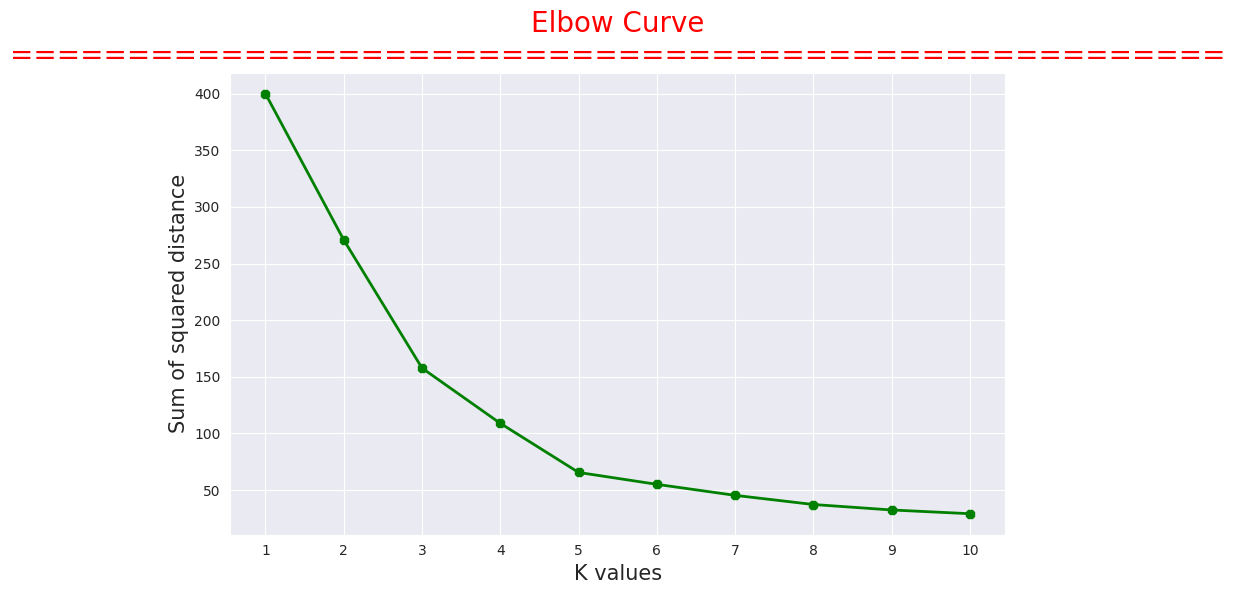

In [60]:
# plotting the  results
plt.figure(figsize=(10,6))
plt.plot(range(1,11), sdd, linewidth=2,color="green", marker="8")
plt.title("Elbow Curve\n====================================================",fontsize = 20, color="red")
plt.xlabel("K values", fontsize = 15)
plt.ylabel("Sum of squared distance", fontsize = 15)
plt.xticks(np.arange(1,11,1))
plt.show()


The above elbow curve represents the value as k=5, lets rebuild the cluster.

In [61]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(num_list)

KMeans(max_iter=50, n_clusters=5)

In [62]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [63]:
mall_df['Label'] = kmeans.labels_
# creating a new column name labes and assigning a cluster label which is obtained form kmeans clusternig to a new column name lable

In [64]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


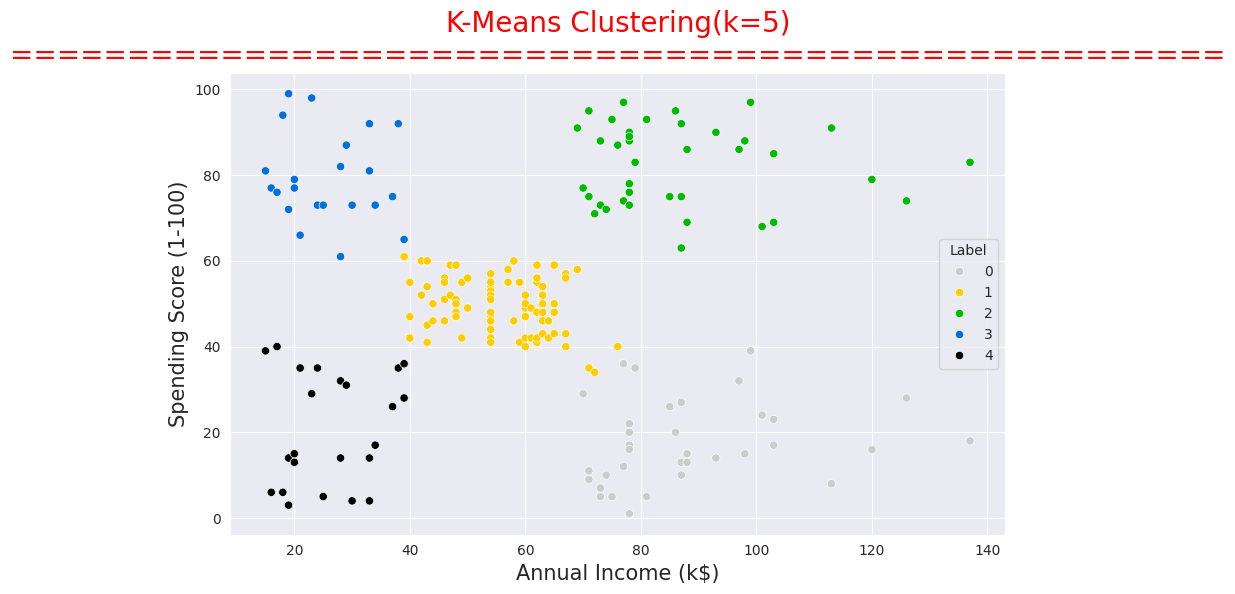

In [65]:
# Scatter plot to displays clustered data into 5 types
plt.figure(figsize=(10,6))
sns.scatterplot(data=mall_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", palette="nipy_spectral_r")
plt.title("K-Means Clustering(k=5)\n====================================================",fontsize = 20, color="red")
plt.xlabel("Annual Income (k$)", fontsize = 15)
plt.ylabel("Spending Score (1-100)", fontsize = 15)
plt.show()

Conclusion: The scatter plot visualizes the results of clustering analysis, providing a clear representation of how customers are grouped based on their income and spending behavior. It allows stakeholders to identify patterns, trends, and insights that can inform business decisions and strategies aimed at improving customer satisfaction and engagement.

**Clustering on the basis of 3 features**

In [66]:
num_list_1 = mall_df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]
num_list_1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [69]:
# model fitting
kmeans1 = KMeans(n_clusters=6, max_iter=50)
kmeans1.fit(num_list_1)

KMeans(max_iter=50, n_clusters=6)

In [70]:
kmeans1.labels_

array([4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 5, 4,
       5, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [71]:
mall_df['Label'] = kmeans.labels_
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [72]:
# claculation sum of squared distance

ssd = []
for num_clusters in range(1,11):
  kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans1.fit(num_list_1)
  ssd.append(kmeans1.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

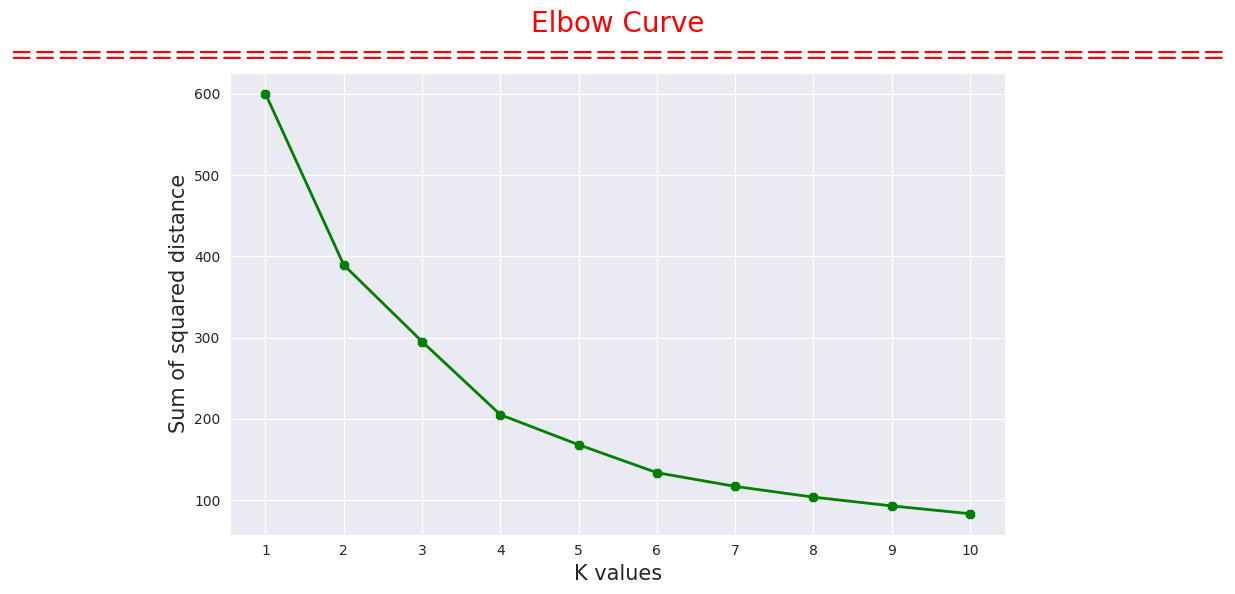

In [76]:
# elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11), ssd, linewidth=2,color="green", marker="8")
plt.title("Elbow Curve\n====================================================",fontsize = 20, color="red")
plt.xlabel("K values", fontsize = 15)
plt.ylabel("Sum of squared distance", fontsize = 15)
plt.xticks(np.arange(1,11,1))
plt.show

In [77]:
import plotly.express as px
fig = px.scatter_3d(mall_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Label')
fig.show()

This 3d scatter plot allows for exploration and analysis of complex data patterns in three-dimensional space, which explains the relationship between the variables and also helps in visualizing cluster divisions.